In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [2]:
data = pd.read_csv("house_full.csv")


In [3]:
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
data_copy = data.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
data.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [9]:
cat_column = ["Suburb","Address","Type","Method","SellerG","CouncilArea","Regionname"]
num_column = ["Rooms","Price","Distance","Postcode","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"]

<AxesSubplot:>

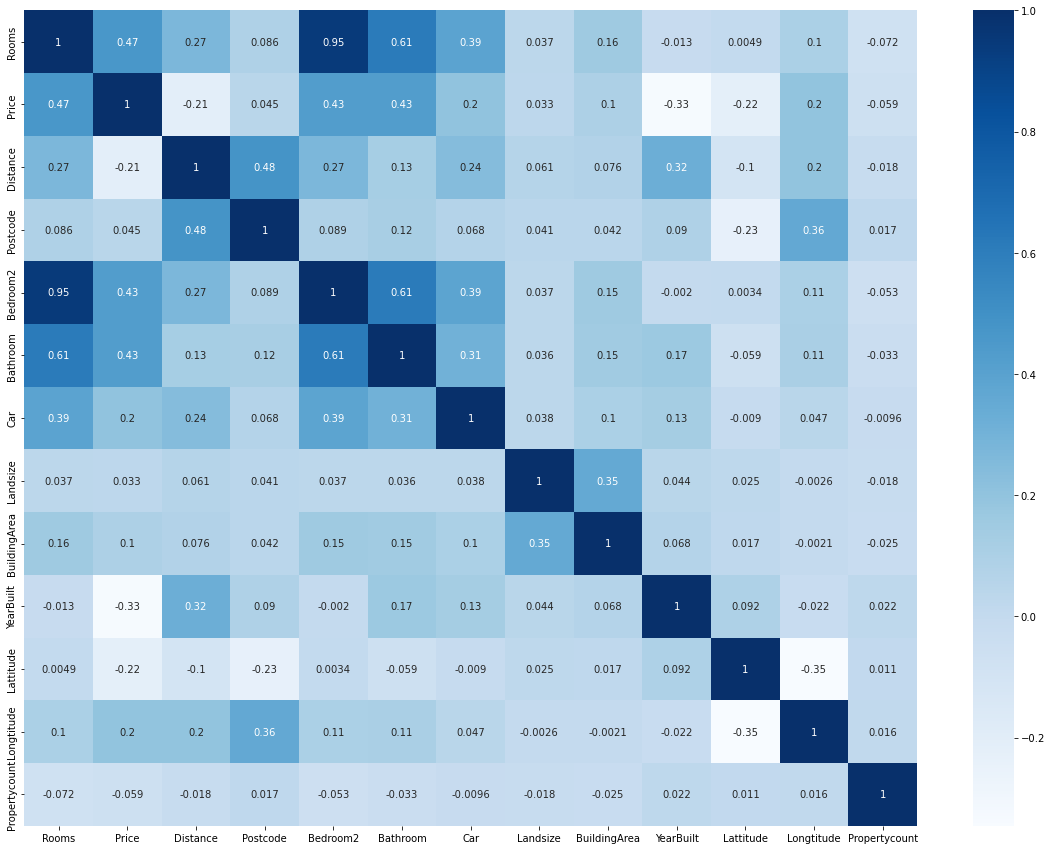

In [10]:
corr = data.corr()
plt.figure(figsize = (20,15))
sbn.heatmap(corr,cmap = "Blues", annot= True)

In [11]:
korelasyon_matrisi = data.corr()

yuksek_korelasyon = (korelasyon_matrisi > 0.60) & (korelasyon_matrisi < 1.0)

sutunlar = yuksek_korelasyon.columns.tolist()
for sutun in sutunlar:
    yuksek_korelasyonlu_degiskenler = list(yuksek_korelasyon[yuksek_korelasyon[sutun]].index)
    for yuksek_korelasyonlu_degisken in yuksek_korelasyonlu_degiskenler:
        if yuksek_korelasyonlu_degisken != sutun and yuksek_korelasyonlu_degisken in data.columns:
            del data[yuksek_korelasyonlu_degisken]


<AxesSubplot:>

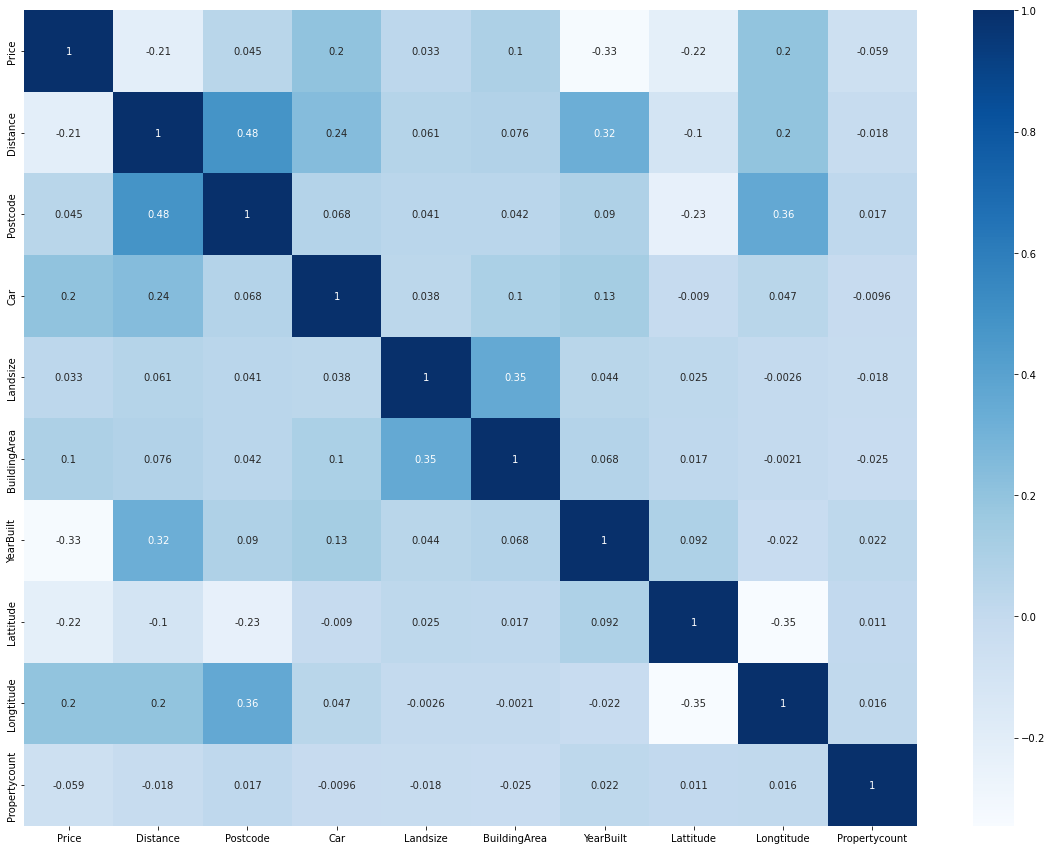

In [12]:
corr = data.corr()
plt.figure(figsize = (20,15))
sbn.heatmap(corr,cmap = "Blues", annot= True)

In [13]:
data.isnull().sum()

Suburb               0
Address              0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
data.dropna(subset=["Distance","Postcode","CouncilArea","Regionname","Propertycount"], inplace = True)

In [15]:
data.isnull().sum()

Suburb               0
Address              0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [16]:
from sklearn.impute import KNNImputer



In [17]:
selected_column = data.iloc[:,3]


In [18]:
selected_column.head(15)


0           NaN
1     1480000.0
2     1035000.0
3           NaN
4     1465000.0
5      850000.0
6     1600000.0
7           NaN
8           NaN
9           NaN
10     941000.0
11    1876000.0
12          NaN
13          NaN
14    1636000.0
Name: Price, dtype: float64

In [19]:
imputer = KNNImputer(n_neighbors = 5)


In [20]:
selected_column_2d = selected_column.values.reshape(-1,1)

In [21]:
imputed_columns = imputer.fit_transform(selected_column_2d)

In [23]:
data["Price"] = imputed_columns

In [24]:
data["Price"].head(15)

0     1.050210e+06
1     1.480000e+06
2     1.035000e+06
3     1.050210e+06
4     1.465000e+06
5     8.500000e+05
6     1.600000e+06
7     1.050210e+06
8     1.050210e+06
9     1.050210e+06
10    9.410000e+05
11    1.876000e+06
12    1.050210e+06
13    1.050210e+06
14    1.636000e+06
Name: Price, dtype: float64

In [25]:
data["Price"].isnull().sum()

0

In [27]:
data_copy['CouncilArea'].fillna(data['CouncilArea'].mode().iloc[0], inplace=True)


In [42]:
data["Car"].fillna(data["Car"].mode().iloc[0], inplace = True)
data["Landsize"].fillna(data["Landsize"].mode().iloc[0], inplace = True)
data["BuildingArea"].fillna(data["BuildingArea"].mode().iloc[0], inplace = True)
data["YearBuilt"].fillna(data["YearBuilt"].mode().iloc[0], inplace = True)
data["Lattitude"].fillna(data["Lattitude"].mode().iloc[0], inplace = True)
data["Longtitude"].fillna(data["Longtitude"].mode().iloc[0], inplace = True)


In [44]:
data.isnull().sum()

Suburb           0
Address          0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [41]:
data.isnull().sum()

Suburb               0
Address              0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [37]:
cat_column

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

In [38]:
num_column

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [63]:
cat_column

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

In [58]:
data.duplicated().sum()


0

In [57]:
data.loc[data.duplicated(keep = False), :]

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [55]:
data.drop(6189, inplace = True)

In [56]:
data.drop(15857, inplace = True)

In [122]:
from sklearn import preprocessing

In [127]:
def one_hot_encoder(dataframe, cat_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns= cat_col, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in data.columns if 10 >= data[col].nunique() > 2]
data = one_hot_encoder(data, ohe_cols, drop_first=True)

In [129]:
data

,Suburb,Address,Price,SellerG,Date,Distance,Postcode,Car,Landsize,BuildingArea,...,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,68 Studley St,1.050210e+06,Jellis,3/09/2016,2.5,3067.0,1.0,126.0,120.0,...,1,0,0,0,1,0,0,0,0,0
1,Abbotsford,85 Turner St,1.480000e+06,Biggin,3/12/2016,2.5,3067.0,1.0,202.0,120.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,1.035000e+06,Biggin,4/02/2016,2.5,3067.0,0.0,156.0,79.0,...,0,0,0,0,1,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,1.050210e+06,Rounds,4/02/2016,2.5,3067.0,1.0,0.0,120.0,...,0,1,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,1.465000e+06,Biggin,4/03/2017,2.5,3067.0,0.0,134.0,150.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,1.480000e+06,Jas,24/02/2018,6.3,3013.0,3.0,593.0,120.0,...,0,0,0,0,0,0,0,0,1,0
34853,Yarraville,29A Murray St,8.880000e+05,Sweeney,24/02/2018,6.3,3013.0,1.0,98.0,104.0,...,0,0,0,0,0,0,0,0,1,0
34854,Yarraville,147A Severn St,7.050000e+05,Jas,24/02/2018,6.3,3013.0,2.0,220.0,120.0,...,0,0,0,0,0,0,0,0,1,0
34855,Yarraville,12/37 Stephen St,1.140000e+06,hockingstuart,24/02/2018,6.3,3013.0,2.0,0.0,120.0,...,0,0,0,0,0,0,0,0,1,0


In [178]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=42)
}



In [181]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y = data["Price"]
x = data.drop("Price",axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test,predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f'{model_name} Modeli Mean Squared Error: {mse}')
    print(f'{model_name} Modeli R2 Score: {r2}')
    print(f'{model_name} Modeli Mean Absolute Error: {mae}')
    print(f'{model_name} Modeli Root Mean Square Error: {rmse}')
    print("\n")

Lasso Modeli Mean Squared Error: 193997422654.80347
Lasso Modeli R2 Score: 0.3459354396947809
Lasso Modeli Mean Absolute Error: 295783.4110465589
Lasso Modeli Root Mean Square Error: 440451.38512076845


LinearRegression Modeli Mean Squared Error: 193997637387.8031
LinearRegression Modeli R2 Score: 0.34593471571998236
LinearRegression Modeli Mean Absolute Error: 295785.0737856434
LinearRegression Modeli Root Mean Square Error: 440451.6288854011


Ridge Modeli Mean Squared Error: 193995815023.7016
Ridge Modeli R2 Score: 0.345940859841685
Ridge Modeli Mean Absolute Error: 295772.1389977414
Ridge Modeli Root Mean Square Error: 440449.56013566593


ElasticNet Modeli Mean Squared Error: 232174984442.41272
ElasticNet Modeli R2 Score: 0.21721934737550141
ElasticNet Modeli Mean Absolute Error: 320066.62091783655
ElasticNet Modeli Root Mean Square Error: 481845.3947506531


RandomForestRegressor Modeli Mean Squared Error: 143670568686.39185
RandomForestRegressor Modeli R2 Score: 0.5156130114992